# Machine Learning Experiment Tracking: MLflow

* Logging experiments, metrics, and models using MLflow.

# Model Deployment:

* Saving the trained model and encoders with joblib.
* Building a web application using Flask to serve predictions based on user inputs.

# Dockerfile:
* Run your model without installing any environment any python libraries.
* At the end of noteboook you will find link of dockerhub just copy and past it in your terminal.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, f1_score, mean_squared_error


import mlflow
import mlflow.sklearn

import joblib

In [2]:
mlflow.set_experiment("Flight Ticket Predication ML Model")

<Experiment: artifact_location='file:///C:/Users/Moin/Science%20learning/Kaggle/Kaggle.notebookv3/mlruns/887695829687885925', creation_time=1723197273349, experiment_id='887695829687885925', last_update_time=1723197273349, lifecycle_stage='active', name='Flight Ticket Predication ML Model', tags={}>

In [3]:
path = (r"E:\DataSet\Csv's\Flight Price Prediction.csv")

df = pd.read_csv(path)

In [4]:
df = df.drop('Unnamed: 0',axis = 1,inplace=False)

In [5]:
df.shape

(300153, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [10]:
# Unique values in different columns
airline = df.airline.nunique()
flight = df.flight.nunique()
source_city = df.source_city.nunique()
departure_time = df.departure_time.nunique()
stops = df.stops.nunique()
arrival_time = df.arrival_time.nunique()

# Print unique values
print(f'Unique airline is:', airline)
print(f'Unique flight is:', flight)
print(f'Unique source_city is:', source_city)
print(f'Unique departure_time is:', departure_time)
print(f'Unique stops:', stops)
print(f'arrival_time:', arrival_time)

Unique airline is: 6
Unique flight is: 1561
Unique source_city is: 6
Unique departure_time is: 6
Unique stops: 3
arrival_time: 6


In [11]:
numeric_col = df.select_dtypes(include=['float', 'int64'])
character_col = df.select_dtypes(include = ['object'])

In [12]:
numeric_col

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [13]:
numeric_col.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [14]:
character_col

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


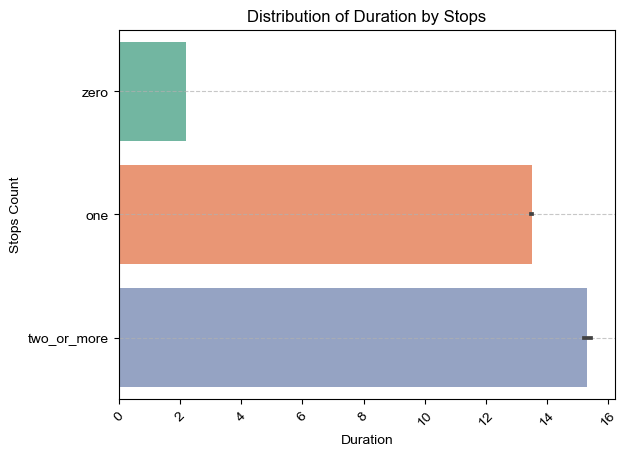

<Figure size 800x600 with 0 Axes>

In [15]:
sns.barplot(data=df, x="duration", y="stops", palette="Set2")

plt.title("Distribution of Duration by Stops")  
plt.xlabel("Duration") 
plt.ylabel("Stops Count") 
plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

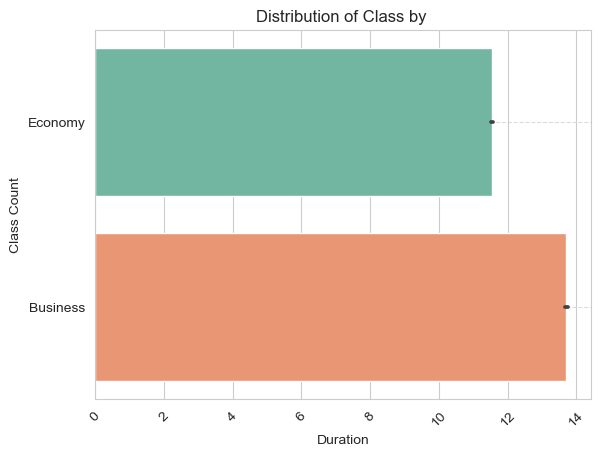

<Figure size 800x600 with 0 Axes>

In [16]:
sns.barplot(data=df, x="duration", y="class", palette="Set2")

plt.title("Distribution of Class by ")  
plt.xlabel("Duration") 
plt.ylabel("Class Count") 
plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

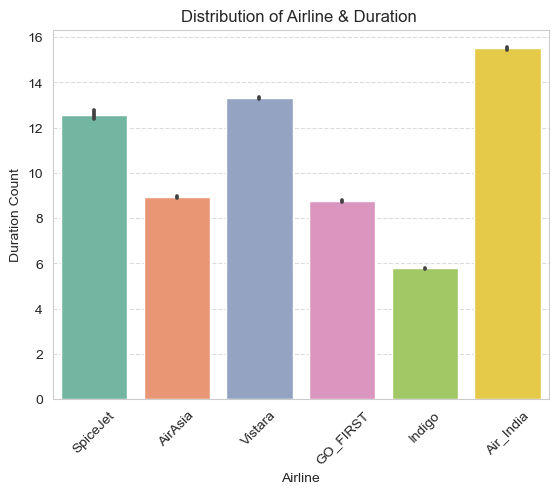

<Figure size 800x600 with 0 Axes>

In [17]:
sns.barplot(data=df, x="airline", y="duration", palette="Set2")

plt.title("Distribution of Airline & Duration ")  
plt.xlabel("Airline") 
plt.ylabel("Duration Count") 
plt.xticks(rotation=45)  
sns.set_style("whitegrid") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.figure(figsize=(8, 6))  

plt.tight_layout()  
plt.show()

In [18]:
character_col.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [19]:
# Encoding
airline_encode = LabelEncoder()
flight_encode = LabelEncoder()
source_city_encode = LabelEncoder()
departure_time_encode = LabelEncoder()
stops_encode = LabelEncoder()
arrival_time_encode = LabelEncoder()
destination_city_encode = LabelEncoder()
class_encode = LabelEncoder()

df['airline'] = airline_encode.fit_transform(df['airline'])
df['flight'] = flight_encode.fit_transform(df['flight'])
df['source_city'] = source_city_encode.fit_transform(df['source_city'])
df['departure_time'] = departure_time_encode.fit_transform(df['departure_time'])
df['stops'] = stops_encode.fit_transform(df['stops'])
df['arrival_time'] = arrival_time_encode.fit_transform(df['arrival_time'])
df['destination_city'] = destination_city_encode.fit_transform(df['destination_city'])
df['class'] = class_encode.fit_transform(df['class'])

In [20]:
# Split data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Train Model with mlflow

with mlflow.start_run():
    model = DecisionTreeRegressor(criterion='squared_error',
    splitter='random',
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=3,)
    
    model.fit(X_train, y_train)

In [22]:
score = model.score(X_train, y_train)*100, model.score(X_test, y_test)*100

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

In [24]:
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f'Model Score:{score}')

R2 Score: 0.9849289921633948
Mean Squared Error: 7692683.758609427
Mean Absolute Error: 1134.5026095062515
Model Score:(99.17263274670509, 98.50767249369213)


In [25]:
mlflow.log_metric('Mean Squared Error', mse)
mlflow.log_metric('Absolute Mean Error',mae)
mlflow.log_metric('R2 Score', r2)

In [26]:
mlflow.log_param('criterian','squared_error')
mlflow.log_param('splitter','random')
mlflow.log_param('max_depth',None)
mlflow.log_param('min_samples_split',4)
mlflow.log_param('min_samples_leaf',4)

4

In [27]:
mlflow.set_tag("Model type", 'Regression model')
mlflow.set_tag('algorithm', 'Decesion Tree Regressor')
mlflow.set_tag('Data Size', len(df))
mlflow.set_tag('Random_State','42')
mlflow.sklearn.log_model(model,'Decesion Tree')

2024/08/09 15:25:17 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [28]:
mlflow.end_run(status="FINISHED")

In [29]:
joblib.dump(airline_encode,'airline_encode')
joblib.dump(flight_encode,'flight_encode')
joblib.dump(source_city_encode,'source_city_encode')
joblib.dump(departure_time_encode,'departure_time_encode')
joblib.dump(stops_encode,'stops_encode')
joblib.dump(arrival_time_encode,'arrival_time_encode')
joblib.dump(destination_city_encode,'destination_city_encode')
joblib.dump(class_encode,'class_encode')
joblib.dump(model, 'flight_model.joblib')

# Pull Image from dockerhub:   
**docker pull orhfusion/battle_prediction_simulator**

{run without installing any dependencies & no need to create environment for it...}

# Or you can refer to my GitHub repository to get files:   
https://github.com/OrhFusion/Flight-ML-Model.git


* Flask
* Html
* Dockerfile
* app.py
* Details
* Dependencies (requirements.txt)

Exposed: Port = 5000.